In [16]:
# PROJECT: Inventory Optimization & Demand Forecasting Decision System
# NOTEBOOK: 01 - Data Understanding & EDA

# OBJECTIVE:
# - Understand historical sales data
# - Perform exploratory data analysis
# - Prepare clean demand data for forecasting
# - Identify trend, seasonality, and volatility patterns

In [17]:
# IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")

In [20]:
# LOAD DATASET
df = pd.read_excel('/content/Global Superstore.xlsx')

# Preview data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [21]:
# DATASET STRUCTURE & METADATA
# Basic dataset information
df.info()

# Check number of rows and columns
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

(51290, 24)

In [22]:
# COLUMN STANDARDIZATION
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [23]:
# DATE HANDLING
# Convert order date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract year and month
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.to_period('M')

In [24]:
# CHECK MISSING VALUES
df.isnull().sum().sort_values(ascending=False)

,0
postal_code,41296
row_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
city,0
order_id,0


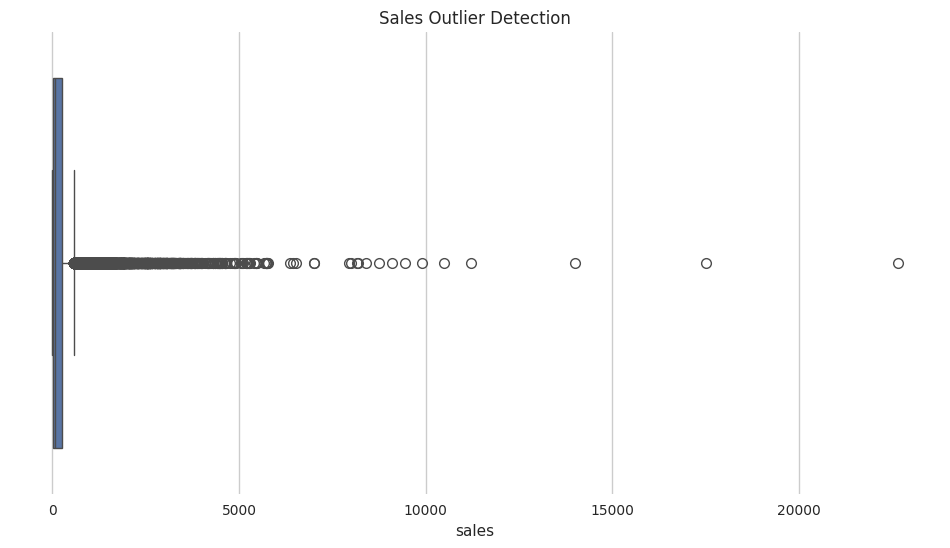

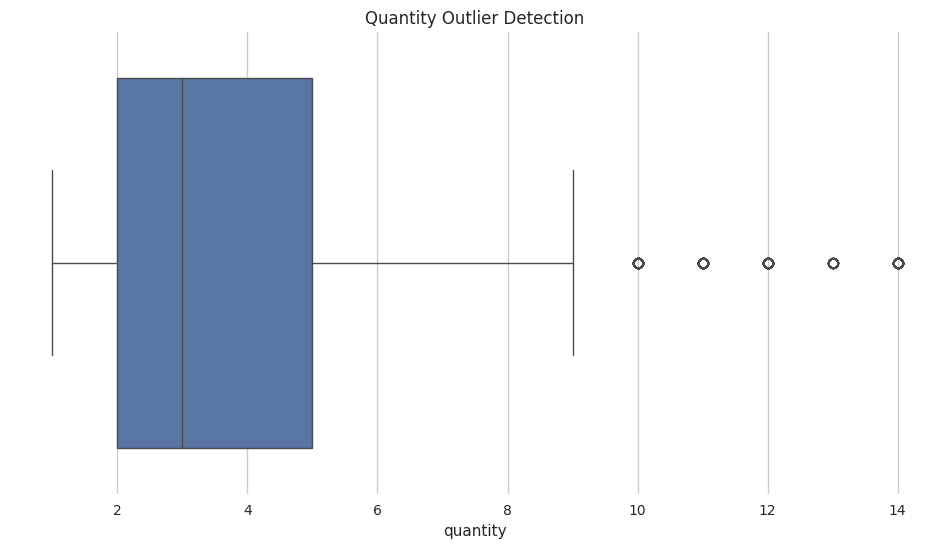

In [25]:
# OUTLIER CHECK - SALES & QUANTITY
# Boxplot for sales
sns.boxplot(x=df['sales'])
plt.title('Sales Outlier Detection')
plt.show()

# Boxplot for quantity
sns.boxplot(x=df['quantity'])
plt.title('Quantity Outlier Detection')
plt.show()

In [26]:
# SKU-LEVEL DEMAND AGGREGATION
# Aggregate demand at SKU (Product) and Monthly level
sku_monthly = (
    df.groupby(['product_id', 'month'])
      .agg(units_sold=('quantity', 'sum'),
           sales=('sales', 'sum'))
      .reset_index()
)

sku_monthly.head()

,product_id,month,units_sold,sales
0,FUR-ADV-10000002,2014-05,2,106.08
1,FUR-ADV-10000002,2014-09,1,53.04
2,FUR-ADV-10000108,2011-04,2,100.02
3,FUR-ADV-10000108,2012-02,4,200.04
4,FUR-ADV-10000108,2012-05,1,50.01


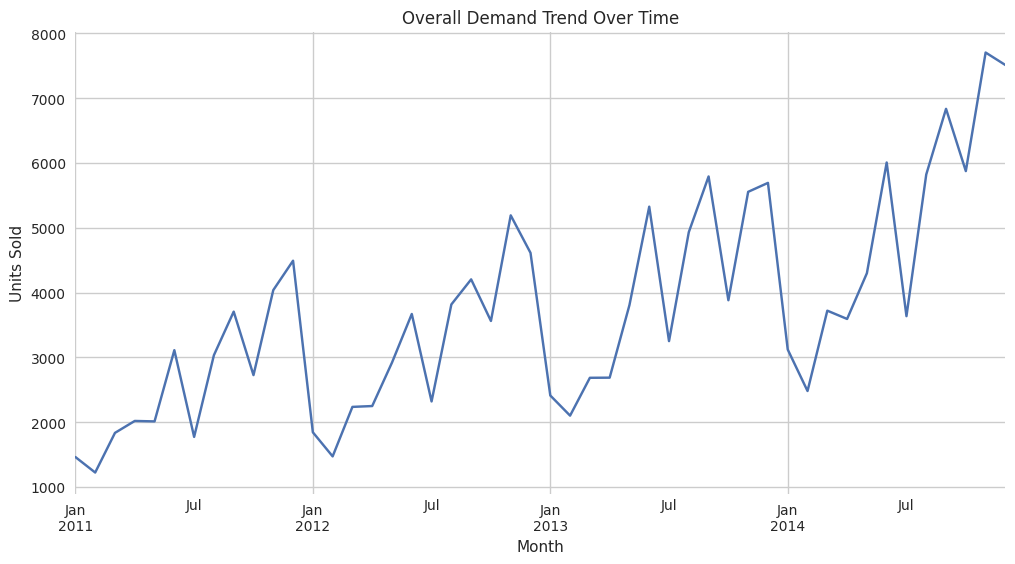

In [27]:
# OVERALL DEMAND TREND ANALYSIS
# Aggregate overall monthly demand
overall_demand = sku_monthly.groupby('month')['units_sold'].sum()

overall_demand.plot()
plt.title('Overall Demand Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.show()

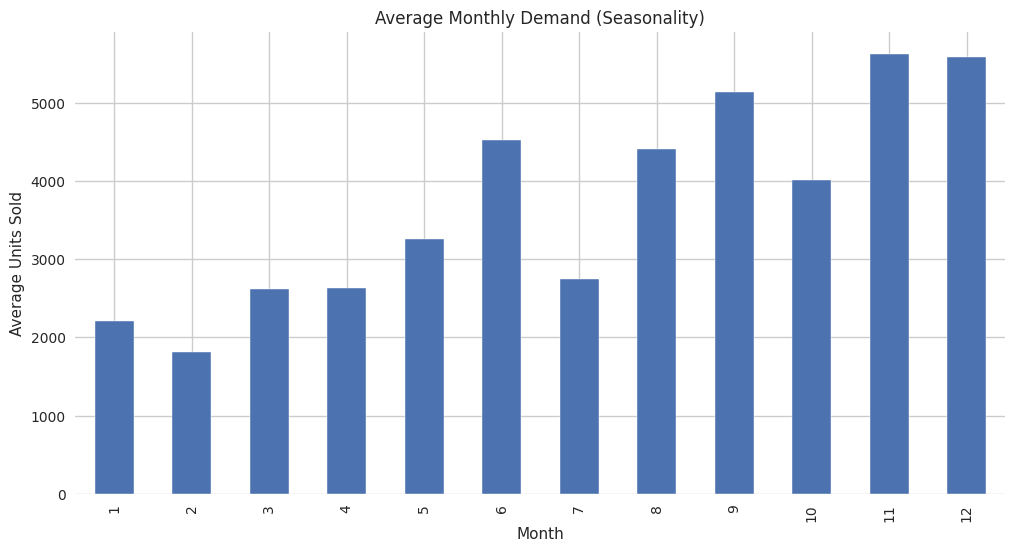

In [28]:
# SEASONALITY CHECK (MONTHLY)
# Convert month to datetime for plotting
overall_demand.index = overall_demand.index.to_timestamp()

# Monthly seasonality
overall_demand.groupby(overall_demand.index.month).mean().plot(kind='bar')
plt.title('Average Monthly Demand (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Units Sold')
plt.show()

In [29]:
# DEMAND VOLATILITY ANALYSIS
# Coefficient of Variation (CV) for demand volatility
volatility = (
    sku_monthly.groupby('product_id')['units_sold']
    .agg(['mean', 'std'])
)

volatility['cv'] = volatility['std'] / volatility['mean']
volatility.sort_values('cv', ascending=False).head()

,mean,std,cv
product_id,,,
OFF-BIN-10000772,3.166667,5.307228,1.675967
OFF-STO-10002661,3.166667,5.307228,1.675967
OFF-ELD-10000819,2.571429,4.157609,1.616848
TEC-MOT-10002560,3.600000,5.813777,1.614938
OFF-ROG-10001101,2.875000,4.517822,1.571416


In [30]:
# FINAL CLEAN DATASET FOR FORECASTING
# Keep only required columns for forecasting
forecast_data = sku_monthly[['product_id', 'month', 'units_sold']].copy()

# Convert period to timestamp
forecast_data['month'] = forecast_data['month'].dt.to_timestamp()

forecast_data.head()

,product_id,month,units_sold
0,FUR-ADV-10000002,2014-05-01,2
1,FUR-ADV-10000002,2014-09-01,1
2,FUR-ADV-10000108,2011-04-01,2
3,FUR-ADV-10000108,2012-02-01,4
4,FUR-ADV-10000108,2012-05-01,1


In [31]:
# SAVE OUTPUT FOR NEXT NOTEBOOK
forecast_data.to_csv('cleaned_demand_data.csv', index=False)

print("Cleaned demand data saved successfully.")

Cleaned demand data saved successfully.
